In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib
from scipy.integrate import simpson
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
# READ INPUT FILES
liptail1=pd.read_csv('theta_rad_liptail.csv',header=None).iloc[1::2, :]
#liptail2=pd.read_csv('theta_rad_liptail_1.csv',header=None).iloc[1::2, :]
#liptail3=pd.read_csv('theta_rad_liptail_2.csv',header=None).iloc[1::2, :]
#liptail4=pd.read_csv('theta_rad_liptail_4.csv',header=None).iloc[1::2, :]
#liptail5=pd.read_csv('theta_rad_liptail_5.csv',header=None).iloc[1::2, :]

type31=pd.read_csv('theta_rad_type3.csv',header=None)
#type32=pd.read_csv('theta_rad_type3_1.csv',header=None)
#type33=pd.read_csv('theta_rad_type3_2.csv',header=None)
#type34=pd.read_csv('theta_rad_type3_4.csv',header=None)
#type35=pd.read_csv('theta_rad_type3_5.csv',header=None)

piezo1=pd.read_csv('theta_rad_pie.csv',header=None)
#piezo2=pd.read_csv('theta_rad_pie_1.csv',header=None)
#piezo3=pd.read_csv('theta_rad_pie_2.csv',header=None)
#piezo4=pd.read_csv('theta_rad_pie_4.csv',header=None)
#piezo5=pd.read_csv('theta_rad_pie_5.csv',header=None)

In [3]:
#Aggr data
#type3tot=pd.concat([type31,type32,type33,type34,type35])
#piezotot=pd.concat([piezo1,piezo2,piezo3,piezo4,piezo5])
#liptailtot=pd.concat([liptail1,liptail2,liptail3,liptail4,liptail5])

type3tot=pd.concat([type31])
piezotot=pd.concat([piezo1])
liptailtot=pd.concat([liptail1])

# Bin averaging
bin_means1, bin_edges1, binnumber1 = stats.binned_statistic(type31[0], type31[1], statistic='mean', bins=200)
#bin_means2, bin_edges2, binnumber2 = stats.binned_statistic(type32[0], type32[1], statistic='mean', bins=200)
#bin_means3, bin_edges3, binnumber3 = stats.binned_statistic(type33[0], type33[1], statistic='mean', bins=200)
#bin_means4, bin_edges4, binnumber4 = stats.binned_statistic(type34[0], type34[1], statistic='mean', bins=200)
#bin_means5, bin_edges5, binnumber5 = stats.binned_statistic(type35[0], type35[1], statistic='mean', bins=200)
bin_meanstot, bin_edgestot, binnumbertot = stats.binned_statistic(type3tot[0], type3tot[1], statistic='mean', bins=200)
bin_meanstot2, bin_edgestot2, binnumbertot2 = stats.binned_statistic(liptailtot[0], liptailtot[1], statistic='mean', bins=200)
bin_width = (bin_edges1[1] - bin_edges1[0])
bin_centers = bin_edges1[1:] - bin_width/2

CHECK RANGE IN PLOT--SHOULD BE CONVEX!!
value chosen=0.9854999999999906


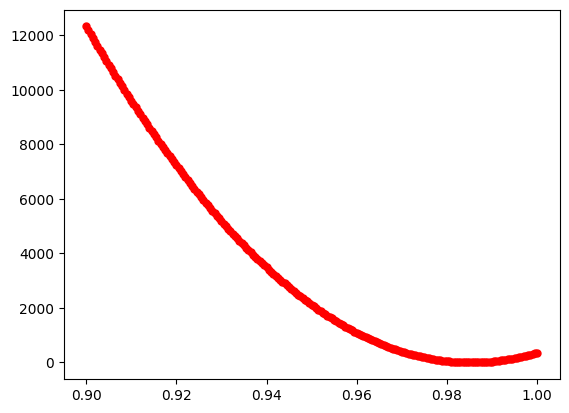

In [4]:
#Normalization (TEST!!)

N_start=0.90
N_incr=0.0005
N_max=1.0

#shift due to averaging
shift=bin_edgestot[1]-bin_edgestot[0]
norm_polar=bin_edgestot[1:]+shift

#lip frac:
frac=0.990
err=[]
errfrac=[]

while (N_start<=N_max):
    frac=N_start
    sinsq=np.multiply(np.sin(norm_polar),np.sin(norm_polar))
    norm_r=np.multiply(bin_meanstot, np.add(1-1*sinsq,frac*sinsq))
    #err_vec=norm_r[norm_polar>np.pi/2]-norm_r[-1]
    err_vec=norm_r[norm_polar>2.0]-norm_r[-1]
    err.append(np.sum(np.multiply(err_vec,err_vec)))
    errfrac.append(N_start)
    #print(N_start,err)
    N_start+=N_incr

print('CHECK RANGE IN PLOT--SHOULD BE CONVEX!!')
fig,ax=plt.subplots()
#plt.hist(samples, bins=50, density=True, histtype='stepfilled',alpha=0.2, label='histogram of data')
plt.plot(errfrac,err, 'ro', label='fitting err', linestyle="None",markersize=5)

frac=errfrac[err.index(min(err))]
print('value chosen='+str(frac))
frac=1.00
#calc, when known frac:
norm_polar=bin_edgestot[1:]-shift/2
#out=np.multiply(yt_avg1_mean, np.add(1-1*np.sin(polar1),frac*np.sin(polar1)))
sinsq=np.multiply(np.sin(norm_polar),np.sin(norm_polar))
norm_r=np.multiply(bin_meanstot, np.add(1-1*sinsq,frac*sinsq))


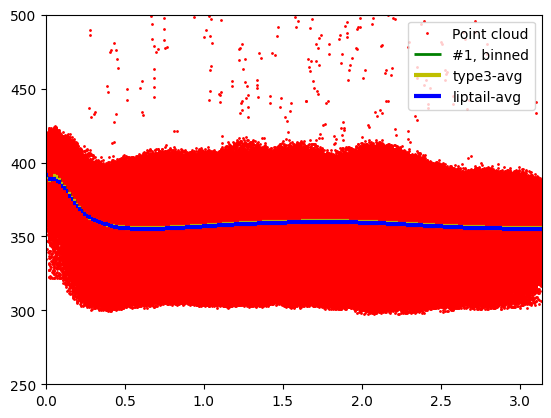

In [5]:
fig,ax=plt.subplots()
#plt.hist(samples, bins=50, density=True, histtype='stepfilled',alpha=0.2, label='histogram of data')
plt.plot(type3tot[0], type3tot[1], 'ro', label='Point cloud', linestyle="None",markersize=1)
plt.hlines(bin_means1, bin_edges1[:-1], bin_edges1[1:], colors='g', lw=2, label='#1, binned')
#plt.hlines(bin_means2, bin_edges2[:-1], bin_edges2[1:], colors='g', lw=2, label='#2, binned')
#plt.hlines(bin_means3, bin_edges3[:-1], bin_edges3[1:], colors='g', lw=2, label='#3, binned')
#plt.hlines(bin_means4, bin_edges4[:-1], bin_edges4[1:], colors='g', lw=2, label='#4, binned')
#plt.hlines(bin_means5, bin_edges5[:-1], bin_edges5[1:], colors='g', lw=2, label='#5, binned')
plt.hlines(bin_meanstot, bin_edgestot[:-1], bin_edgestot[1:], colors='y', lw=3, label='type3-avg')
plt.hlines(bin_meanstot2, bin_edgestot2[:-1], bin_edgestot2[1:], colors='b', lw=3, label='liptail-avg')

#plt.plot(norm_polar,norm_r, 'k-',label='Normalized')
#plt.plot([0,np.pi],[norm_r[-1],norm_r[-1]], label='ref')
plt.legend(fontsize=10)
ax.legend(loc="upper right")
ax.set_xlim([0,np.pi])
ax.set_ylim([250,500])
plt.savefig('samples.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
#gibbs99=[np.percentile(piezo1[0],99),np.percentile(piezo2[0],99),np.percentile(piezo3[0],99)]
#np.std(gibbs99)

In [7]:
#
#Stats on the southern hemisphere
#

K=3 #K-sigma dev.
#south_pole=norm_r[norm_polar > np.pi/2]
south_pole=norm_r[norm_polar > 1.0]
twosig_low=south_pole.mean()-K*south_pole.std()
twosig_high=south_pole.mean()+K*south_pole.std()

#Stats to find "footprint"
#footprint=norm_polar[norm_r<twosig_low][-1]

#Stats to find "minimum"
#mini=norm_polar[norm_r==min(norm_r)]

#
# Binning piezo
#
cntpie, binpie = np.histogram(piezotot[0],bins=100,density=True)
cntliptail, binliptail = np.histogram(liptailtot[0],bins=100,density=True)
gibbs99=np.percentile(piezotot[0],99)
gibbs95=np.percentile(piezotot[0],95)

In [10]:
gibbs99=np.percentile(piezotot[0],99)
print( gibbs99 )

0.38663343391233035


/var/folders/c8/mg5_rl016nl7jxykwhd6sn3c0000gn/T/ipykernel_2127/4054120177.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


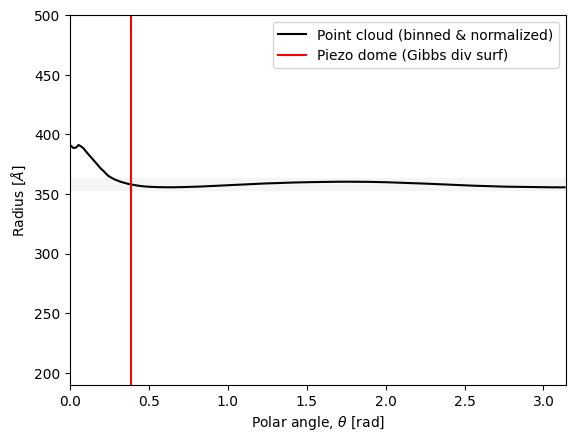

In [9]:
fig,ax=plt.subplots()
plt.xlabel(r"Polar angle, $\theta$ [rad]")
plt.ylabel("Radius [$\AA$]")
ax.plot(norm_polar,norm_r,label='Point cloud (binned & normalized)',color='k')

ax.set_ylim([190,500])
#ax.plot([0,math.pi],[twosig_low,twosig_low],label=r'3$\sigma$ of range 1<$\theta$<$\pi$',color='gray')
#ax.plot([0,math.pi],[twosig_high,twosig_high],color='gray')

rect1 = matplotlib.patches.Rectangle((0.0,twosig_low), math.pi, 2*3*south_pole.std(), color='whitesmoke')
ax.add_patch(rect1)

#plt.plot([mini,mini],[-1,1000],label='Minimum well',color='purple')
#plt.plot([gibbs99,gibbs99],[-1,1000],label='Piezo dome (Gibbs div surf)',color='red')
#plt.plot([footprint,footprint],[-1,1000],label='Piezo footprint',color='orange')

ax.set_xlim([0,math.pi])

ax.legend(loc="upper right")


plot_data = pd.DataFrame({
    'Polar_angle_rad': norm_polar,
    'Radius_A': norm_r
})
plot_data.to_csv('plot_data.csv', index=False)


#fig.savefig('profile_avg.png', format='png', dpi=300, bbox_inches='tight')
fig.show()